# IMAGE CLASSIFICATION USING CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

### **numpy**: Used for numerical computations and handling arrays efficiently.
### **matplotlib.pyplot**: Used to visualize images, graphs, or training performance like accuracy/loss.
### **seaborn**: Advance library for visualizations.
### **tensorflow**: An open-source library for building and training deep learning models.
### **cifar10**: Loads the CIFAR-10 dataset, a collection of 60,000 32x32 color images across 10 categories
### **to_catgorical**: Converts integer labels (e.g., 0-9) into one-hot encoded format for classification tasks.

# Load CIFAR-10 dataset

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

## Loads the CIFAR-10 dataset and splits it into:
### X_train, Y_train: Training images and their labels.
### X_test, Y_train: Testing images and their labels.
## CIFAR-10 has 60,000 color images (32x32 pixels), with:
### 50,000 for training and 10,000 for testing.
### 10 classes (e.g., airplane, car, bird, etc.).

In [3]:
# normalize pixel values (0-255) to (0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### Converts image pixel values from integers (0-255) to floats (0.0-1.0).
### Normalization helps the model train faster and improves accuracy.
### Neural networks perform better when input values are on a similar scale.

In [4]:
# one-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

### Converts class labels (e.g., 3) into one-hot encoded vectors (e.g., [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]).
### Required for multiclass classification using categorical cross-entropy loss.
### 10 indicates the number of distinct classes in CIFAR-10.

In [5]:
# class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Defines the names of the 10 classes in the CIFAR-10 dataset.
### Helps in mapping model predictions (numerical class indices) to human-readable labels.
### Useful when displaying or interpreting results (e.g., predicted class: 'cat').

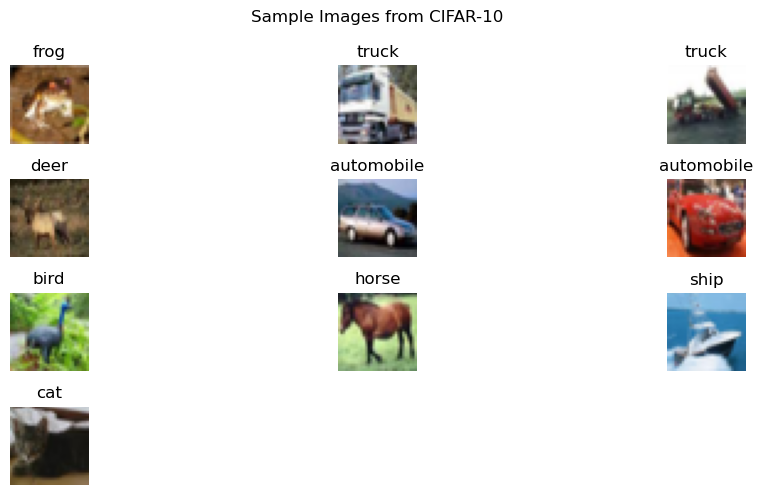

In [6]:
# display sample images
plt.figure(figsize=(10,5))
for i in range(len(class_names)):
    plt.subplot(4, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(Y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10")
plt.tight_layout()
plt.show()

In [7]:
# import required layers and models from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Sequential: Used to build the model layer by layer in a linear stack.
### Conv2D: Applies convolution filters to extract features from input images.
### MaxPooling2D: Reduces spatial dimensions (height/width) to downsample feature maps.
### Flatten: Converts 2D feature maps into 1D vector for the dense layers.
### Dense: Fully connected layer used for classification or intermediate layers.
### Dropout: Helps prevent overfitting by randomly disabling neurons during training.

In [8]:
# build the cnn model
model = Sequential()

In [9]:
# first convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

### Adds a Conv2D layer with 32 filter, 3x3 kernel, and ReLU activation.
### padding='same' keeps the output size same as input.
### input_shape=(32, 32, 3) defines input size for dataset (32x32 RGB image).
### Adds a second Conv2D layer with same parameters. Helps the network learn more complex features.
### Adds a MaxPooling2D to reduce spatial size (downsampling) to lower computation. Takes the maximum value from each 2x2 block.
### Adds a Dropout to randomly drops 25% of the neurons during training to prevent overfitting.

In [10]:
# second convolutional layer
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

### Adds a Conv2D layer with 64 filters and ReLU activation. Higher filter count helps detect more complex patterns.
### Adds another 64-filter convolution layer to increase learning capacity.
### Again downsamples the feature map size using 2x2 max pooling.
### Randomly drops 25% of neurons to reduce overfitting.

In [11]:
# flatten before fully connected layers
model.add(Flatten())

### Converts the 3D feature maps into a 1D vector.
### Prepares the data for input into the fully connected (dense) layers.

In [12]:
# fully connected (Dense) layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # regularization to prevent overfitting

### Dense(512, activation='relu'): Adds a fully connected layer with 512 neurons and ReLU activation for introducing non-linearity.
### Adds a Dropout(0.5) to randomly drops 50% of the neurons during training to prevent overfitting and improve generalization.

In [13]:
# output layer
model.add(Dense(10, activation='softmax')) # 10 classes
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Dense(10): Final layer with 10 neurons, one for each class in CIFAR-10.
### activation='softmax': Converts the output into probabilities summing to 1, used for multi-class classification.

In [14]:
# we use data augmentation to better generalization 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)

### ImageDataGenerator: Automatically generates augmented image batches during training.
### rotation_range=15: Randomly rotates images by upto 15 degrees.
### width_shift_range=0.1, height_shift_range=0.1: Randomly shifts the image along width and height by 10%.
### horizontal_flip=True: Randomly flips images horizontally.
### datagen.fit(X_train): Prepares the generator by calculating required statistics from training data.
## Purpose:

### Augmentation helps prevent overfitting and improves model performance by making the model more robust to variations in input images.

In [15]:
# print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# train the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 128ms/step - accuracy: 0.3102 - loss: 1.8542 - val_accuracy: 0.5275 - val_loss: 1.2916
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.5231 - loss: 1.3177 - val_accuracy: 0.6057 - val_loss: 1.0908
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.5868 - loss: 1.1601 - val_accuracy: 0.6575 - val_loss: 0.9638
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.6202 - loss: 1.0707 - val_accuracy: 0.6910 - val_loss: 0.8796
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.6470 - loss: 0.9982 - val_accuracy: 0.7024 - val_loss: 0.8573
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.6650 - loss: 0.9515 - val_accuracy: 0.7307 - val_loss: 0.7706
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 126ms/step - accuracy: 0.6778 - loss: 0.9227 - val_accuracy: 0.7044 - val_loss: 0.8720
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 125ms/step - accuracy: 0.6926 - loss

### model.fit(...): Trains the CNN model using the dataset.
### datagen.flow(...): Applies real-time data augmentation (like rotation, flip, etc.) to learning training images to improve generalization.
### batch_size=64: Trains in mini-batches of 64 images at a time.
### epochs=20: Runs for 20 complete passes through the training data.
### validation_data=(X_test, Y_test): Evaluates model performace on the test set after each epoch to track overfitting or improvement.
### This step returns a history object containing training and validation accuracy/loss which we can plot later.

In [34]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7630 - loss: 0.6930
Test Accuracy: 0.7624


### model.evaluate(...): Evaluates the model's performance on the test dataset (unseen data).
### test_loss: Measures how well the model predicts (lower is better).
### test_accuracy: Indicates the proportion of correct predictions.
### print(...): Displays the test accuracy in a readable format (4 decimal places).
### This step helps verify how well the model genealizes to new data.
## Interpretation:

### Accuracy of 79.44% means CNN model correctly classified about 79 out of 100 images.
### Loss of 0.6064 suggests the model's predictions are reasonably close to actual labels.

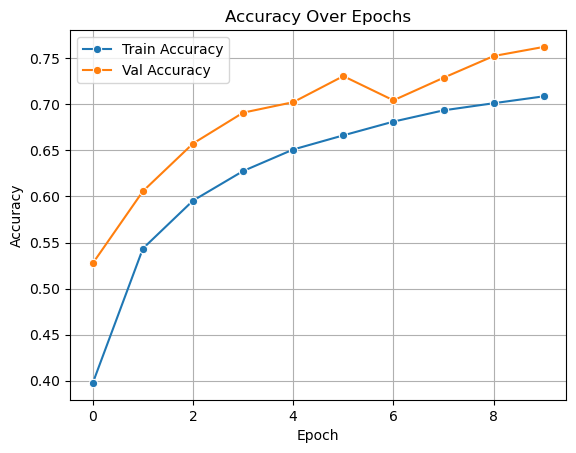

In [36]:
# accuracy
sns.lineplot(history.history['accuracy'], label='Train Accuracy', marker='o')
sns.lineplot(history.history['val_accuracy'],label='Val Accuracy', marker='o')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

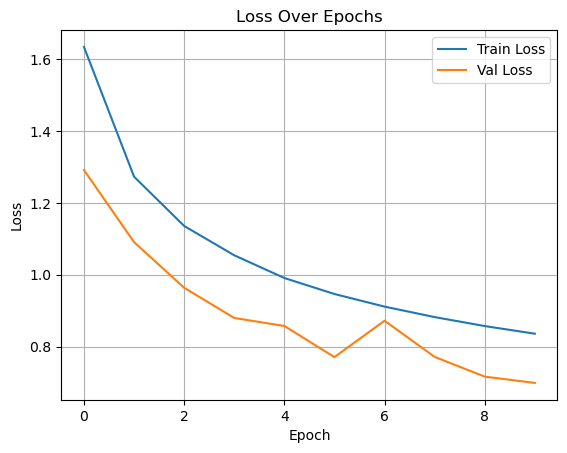

In [38]:
# loss
sns.lineplot(history.history['loss'], label='Train Loss')
sns.lineplot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [40]:
def predict_image(index):
    image = X_test[index]
    true_label = int(np.argmax(Y_test[index]))
    img_input = np.expand_dims(image, axis=0)
    prediction = model.predict(img_input)
    predicted_class = int(np.argmax(prediction))

    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Predicted: {class_names[predicted_class]} | Actual: {class_names[true_label]}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


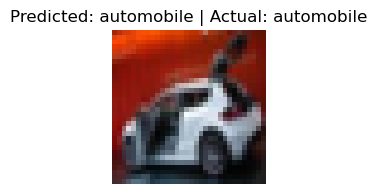

In [44]:
predict_image(6)